In [1]:
# requests for fetching html of website
import requests
import re
from bs4 import BeautifulSoup

## Scraping

In [2]:
# make the GET request to a url
r = requests.get('http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html')

In [3]:
# extract the content
c = r.content

In [4]:
soup = BeautifulSoup(c)

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [5]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie10 lt-ie9 lt-ie8 lt-ie7" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie10 lt-ie9 lt-ie8" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie10 lt-ie9" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->
<!--[if gt IE 9]><!-->
<html class="no-js" dir="ltr" lang="en-US" prefix="fb: http://www.facebook.com/2008/fbml og: http://ogp.me/ns#">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="100000302287435" property="fb:admins"/

In [6]:
# find the element on the webpage
main_content = soup.find('div', attrs = {'class': 'entry-content'})

In [7]:
print(main_content.prettify())

<div class="entry-content" id="entryContent">
 <p>
  CLEVELAND, Ohio -
  <a href="http://www.case.edu/">
   Case Western Reserve University
  </a>
  President Barbara Snyder's $700,312 base pay and $175,000 bonus in 2015 again made her the highest paid private college leader in Ohio, according to an annual report.
 </p>
 <p>
  Nationally, Snyder's total compensation of $1.154 million, which can include deferred compensation and other pay, ranked 41st out of 541 presidents of private colleges according to the report by the
  <a href="http://chronicle.com/">
   Chronicle of Higher Education.
  </a>
 </p>
 <p>
  She is among 58 presidents to earn $1 million or more. The previous year, 39 private college presidents earned more than $1 million.
 </p>
 <p>
  The Chronicle's
  <a href="https://www.chronicle.com/interactives/executive-compensation#id=table_private_2015">
   compensation tables
  </a>
  come from a review of federal tax documents from the 2015 calendar year, the most recent ava

In [8]:
# extract the relevant information as text
content = main_content.find('ul').text

In [9]:
print(content) # data type is str


Grant Cornwell, College of Wooster (left in 2015): $911,651
Marvin Krislov, Oberlin College (left in 2016):  $829,913
Mark Roosevelt, Antioch College, (left in 2015): $507,672
Laurie Joyner, Wittenberg University (left in 2015): $463,504
Richard Giese, University of Mount Union (left in 2015): $453,800
Sean Decatur,Kenyon College: $451,698
Adam Weinberg, Denison University: $435,322
Daniel Dibiasio, Ohio Northern University: $414,716
Denvy Bowman, Capital University (left in 2016): $388,570
Anne Steele, Muskingum University (left in 2016): $384,233
Kathy Krendl, Otterbein University:  $378,035
Rockwell Jones, Ohio Wesleyan University: $366,625
Robert Helmer, Baldwin Wallace University: $365,616
Robert Huntington, Heidelberg University: $300,005
Lori Varlotta, Hiram College: $293,336
Joseph Bruno, Marietta College (left in 2016): $288,295
W. Richard Merriman Jr., University of Mount Union (started in June 2015): $221,761



In [10]:
# Extract the relevant information as text
content = main_content.find('ul').text

## Regex

In [11]:
import pprint

In [12]:
pprint.pprint(content)

('\n'
 'Grant Cornwell, College of Wooster (left in 2015): $911,651\n'
 'Marvin Krislov, Oberlin College (left in 2016): \xa0$829,913\n'
 'Mark Roosevelt, Antioch College, (left in 2015): $507,672\n'
 'Laurie Joyner, Wittenberg University (left in 2015): $463,504\n'
 'Richard Giese, University of Mount Union (left in 2015): $453,800\n'
 'Sean Decatur,Kenyon College: $451,698\n'
 'Adam Weinberg, Denison University: $435,322\n'
 'Daniel Dibiasio, Ohio Northern University: $414,716\n'
 'Denvy Bowman, Capital University (left in 2016): $388,570\n'
 'Anne Steele, Muskingum University (left in 2016): $384,233\n'
 'Kathy Krendl, Otterbein University: \xa0$378,035\n'
 'Rockwell Jones, Ohio Wesleyan University: $366,625\n'
 'Robert Helmer, Baldwin Wallace University: $365,616\n'
 'Robert Huntington, Heidelberg University: $300,005\n'
 'Lori Varlotta, Hiram College: $293,336\n'
 'Joseph Bruno, Marietta College (left in 2016): $288,295\n'
 'W. Richard Merriman Jr., University of Mount Union (star

In [13]:
# create a pattern to match names
name_pattern = re.compile(r'^([A-Z]{1}.+)(?:,)', flags=re.M)
names = name_pattern.findall(content)
pprint.pprint(names)

['Grant Cornwell, College of Wooster (left in 2015): $911',
 'Marvin Krislov, Oberlin College (left in 2016): \xa0$829',
 'Mark Roosevelt, Antioch College, (left in 2015): $507',
 'Laurie Joyner, Wittenberg University (left in 2015): $463',
 'Richard Giese, University of Mount Union (left in 2015): $453',
 'Sean Decatur,Kenyon College: $451',
 'Adam Weinberg, Denison University: $435',
 'Daniel Dibiasio, Ohio Northern University: $414',
 'Denvy Bowman, Capital University (left in 2016): $388',
 'Anne Steele, Muskingum University (left in 2016): $384',
 'Kathy Krendl, Otterbein University: \xa0$378',
 'Rockwell Jones, Ohio Wesleyan University: $366',
 'Robert Helmer, Baldwin Wallace University: $365',
 'Robert Huntington, Heidelberg University: $300',
 'Lori Varlotta, Hiram College: $293',
 'Joseph Bruno, Marietta College (left in 2016): $288',
 'W. Richard Merriman Jr., University of Mount Union (started in June 2015): '
 '$221']


In [14]:
# create a pattern to match schools
school_pattern = re.compile(r'(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)')
schools = school_pattern.findall(content)
pprint.pprint(schools)

['College of Wooster',
 'Oberlin College',
 'Antioch College',
 'Wittenberg University',
 'University of Mount Union',
 'Kenyon College',
 'Denison University',
 'Ohio Northern University',
 'Capital University',
 'Muskingum University',
 'Otterbein University',
 'Ohio Wesleyan University',
 'Baldwin Wallace University',
 'Heidelberg University',
 'Hiram College',
 'Marietta College',
 'University of Mount Union']


In [15]:
# create a pattern to match the salaries
salary_pattern = re.compile(r'\$.+')
salaries = salary_pattern.findall(content)
pprint.pprint(salaries)

['$911,651',
 '$829,913',
 '$507,672',
 '$463,504',
 '$453,800',
 '$451,698',
 '$435,322',
 '$414,716',
 '$388,570',
 '$384,233',
 '$378,035',
 '$366,625',
 '$365,616',
 '$300,005',
 '$293,336',
 '$288,295',
 '$221,761']


In [16]:
# convert salaries to numbers in a list comprehension
salaries = [int(''.join(s[1:].split(','))) for s in salaries]
pprint.pprint(salaries)

[911651,
 829913,
 507672,
 463504,
 453800,
 451698,
 435322,
 414716,
 388570,
 384233,
 378035,
 366625,
 365616,
 300005,
 293336,
 288295,
 221761]


In [17]:
# checking process
len(names) == len(schools) == len(salaries)

True

## Visualizing

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# put all information above into a dataframe
df = pd.DataFrame({'Salary': salaries,
                   'President': names,
                   'College': schools})

In [20]:
# append information
df.loc[17, :] = ['CWRU', 'Barbara Synder', 1154000]

In [21]:
# sort the values by highest to lowest salary
df = df.sort_values('Salary', ascending=False).reset_index()

In [22]:
df.drop('index',axis=1,inplace=True)

In [23]:
df.head()

,College,President,Salary
0,CWRU,Barbara Synder,1154000.0
1,College of Wooster,"Grant Cornwell, College of Wooster (left in 20...",911651.0
2,Oberlin College,"Marvin Krislov, Oberlin College (left in 2016)...",829913.0
3,Antioch College,"Mark Roosevelt, Antioch College, (left in 2015...",507672.0
4,Wittenberg University,"Laurie Joyner, Wittenberg University (left in ...",463504.0


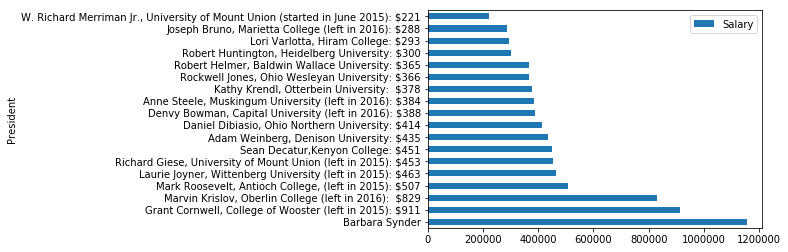

In [29]:
# quick visualisation built in pandas
df.plot(kind='barh', x='President', y='Salary')

## Improve The Plot!

In [30]:
import seaborn as sns

In [34]:
# pick a style
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 16

# sort the values by highest to lowest salary
df = df.sort_values('Salary', ascending=False).reset_index()

# shorten this one name for plotting
df.ix[df['College'] == 'University of Mount Union', 'College'] = 'Mount Union'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


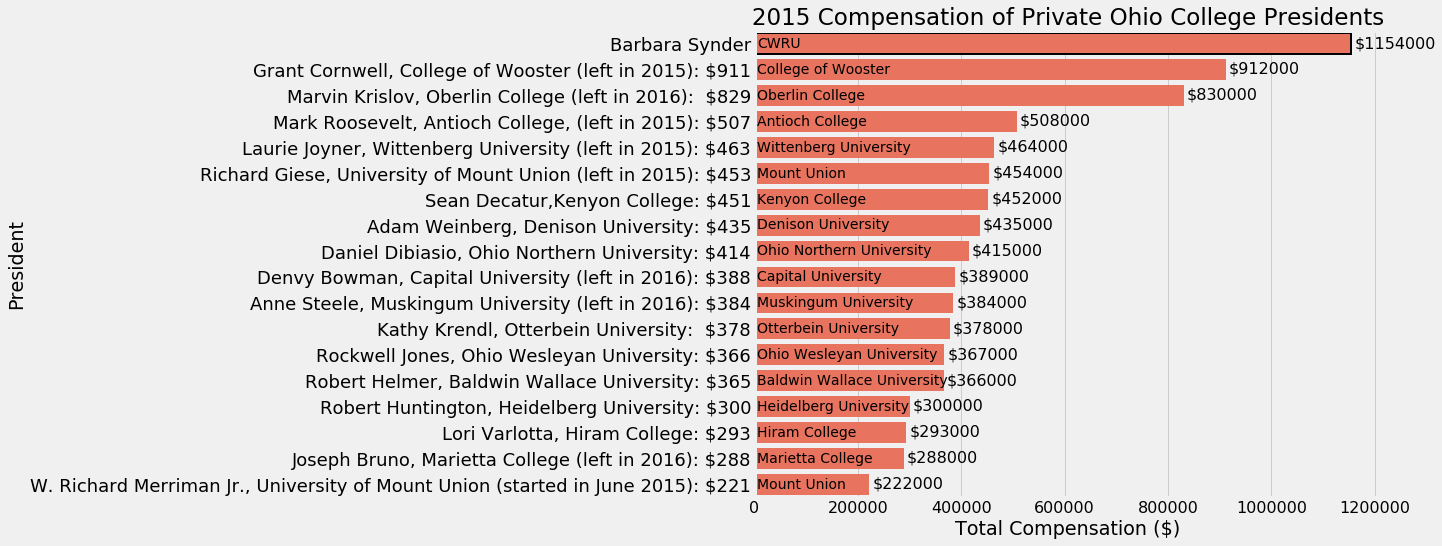

In [36]:
# create the basic figure
plt.figure(figsize=(10, 8))
sns.barplot(x = 'Salary', y = 'President', data = df, 
            color = 'tomato', edgecolor = 'k', linewidth = 2)

# add text showing values and colleges
for i, row in df.iterrows():
  plt.text(x = row['Salary'] + 6000, y = i + 0.15, s = '$%d' % (round(row['Salary'] / 1000) * 1000))
  plt.text(x = 5000, y = i + 0.15, s = row['College'], size = 14)

# labels are a must!
plt.xticks(size = 16); plt.yticks(size = 18)
plt.xlabel('Total Compensation ($)')
plt.ylabel('President') 
plt.title('2015 Compensation of Private Ohio College Presidents');

In [40]:
# convert salaries into $ / 5 minutes assuming 2000 work hours per year
five_minutes_fraction = 5 / (2000 * 60)
total_df = pd.DataFrame(df.groupby('College')['Salary'].sum())
total_df['five_minutes_cost'] = round(total_df['Salary'] * five_minutes_fraction)
total_df = total_df.sort_values('five_minutes_cost', ascending = False).reset_index()

total_df.head()

,College,Salary,five_minutes_cost
0,CWRU,1154000.0,48.0
1,College of Wooster,911651.0,38.0
2,Oberlin College,829913.0,35.0
3,Mount Union,675561.0,28.0
4,Antioch College,507672.0,21.0


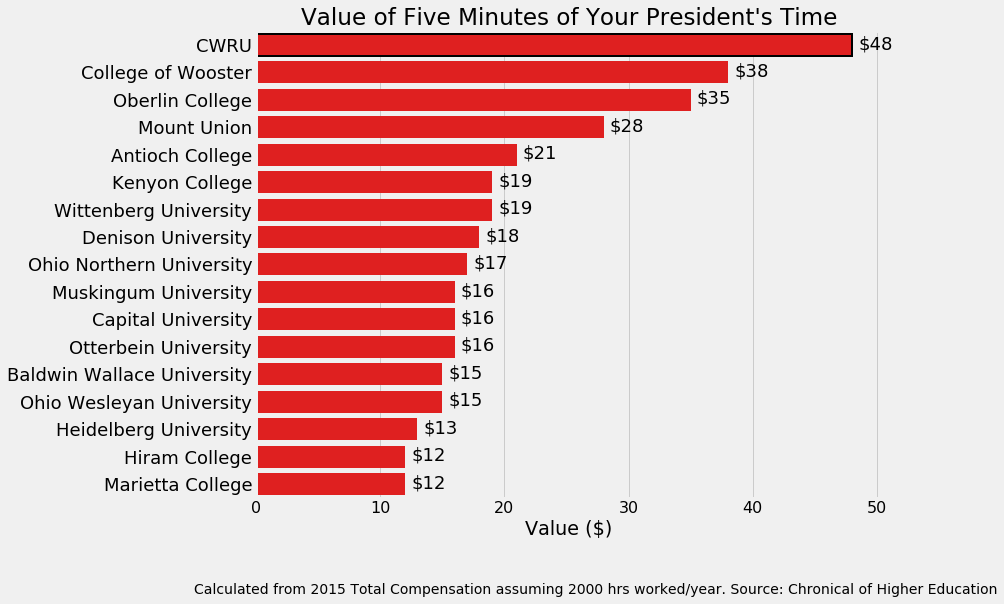

In [41]:
# text for caption
txt = 'Calculated from 2015 Total Compensation assuming 2000 hrs worked/year. Source: Chronical of Higher Education'

# create the basic barplot
plt.figure(figsize=(10, 8))
sns.barplot(x = 'five_minutes_cost', y = 'College', data = total_df, 
            color = 'red', edgecolor = 'k', linewidth = 2)

# add the text with the value
for i, row in total_df.iterrows():
  plt.text(x = row['five_minutes_cost'] + 0.5, y = i + 0.15, 
           s = '$%d' % (row['five_minutes_cost']), size = 18)

# add the caption
plt.text(x = -5, y = 20, s = txt, size = 14)

# add the labels
plt.xticks(size = 16); plt.yticks(size = 18)
plt.xlabel('Value ($)')
plt.ylabel('') 
plt.title("Value of Five Minutes of Your President's Time");

<hr/>